<a href="https://colab.research.google.com/github/debtavares/AnaliseExploratoriaDSA/blob/main/AnaliseExploratoriaDSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Projeto de Análise Exploratória do curso Python Fundamentos



In [19]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")
%matplotlib inline

In [20]:
veiculos = pd.read_csv("autos.csv")

In [21]:
veiculos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313682,2016-03-21 09:50:58,Mitsubishi_Cold,privat,Offer,0,control,Other,2005,manuell,0,...,2694,2016-03-21 10:42:49,2016,2016,March,March,0,10,11,5
313683,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Offer,2200,test,Other,2005,Unspecified,0,...,39576,2016-04-06 00:46:52,2016,2016,March,March,23,0,11,11
313684,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Offer,1199,test,cabrio,2000,automatik,101,...,26135,2016-03-11 18:17:12,2016,2016,March,March,6,18,16,9
313685,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Offer,9200,test,bus,1996,manuell,102,...,87439,2016-04-07 07:15:26,2016,2016,March,March,19,7,20,9


In [22]:
veiculos.describe()

,price,yearOfRegistration,powerPS,kilometer,postalCode,yearOfCreation,yearCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
count,313687.000000,313687.000000,313687.000000,313687.000000,313687.000000,313687.000000,313687.0,313687.000000,313687.000000,313687.000000,313687.000000
mean,3902.961863,2001.909231,109.564250,131435.778340,50349.563597,2015.999930,2016.0,8.543274,11.834207,14.090769,6.235187
std,4168.150636,6.803211,191.741685,34963.149957,25765.545682,0.008374,0.0,8.511917,6.504730,6.803211,3.454766
min,0.000000,1910.000000,0.000000,5000.000000,1067.000000,2015.000000,2016.0,0.000000,0.000000,0.000000,1.000000
25%,999.000000,1998.000000,68.000000,125000.000000,29640.000000,2016.000000,2016.0,2.000000,7.000000,10.000000,3.000000
50%,2490.000000,2002.000000,104.000000,150000.000000,49205.000000,2016.000000,2016.0,6.000000,12.000000,14.000000,6.000000
75%,5400.000000,2006.000000,140.000000,150000.000000,70794.000000,2016.000000,2016.0,13.000000,17.000000,18.000000,9.000000
max,28800.000000,2016.000000,20000.000000,150000.000000,99998.000000,2016.000000,2016.0,384.000000,23.000000,106.000000,11.000000


## Distribuição de Veículos com base no Ano de Registro

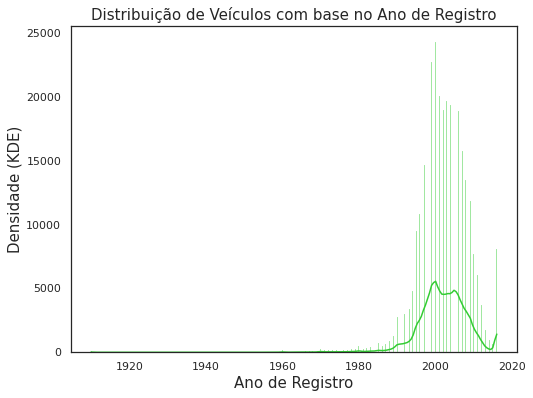

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(veiculos["yearOfRegistration"], color="#33cc33",kde=True, ax=ax)
ax.set_title('Distribuição de Veículos com base no Ano de Registro', fontsize= 15)
plt.ylabel("Densidade (KDE)", fontsize= 15)
plt.xlabel("Ano de Registro", fontsize= 15)
plt.show()

## Variação da faixa de preço pelo tipo de veículo

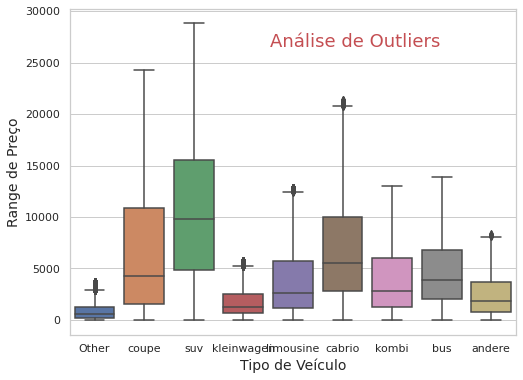

In [24]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="vehicleType", y="price", data=veiculos)
ax.text(5.25,27000,"Análise de Outliers",fontsize=18,color="r",ha="center", va="center")
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':14})
ax.yaxis.set_label_text("Range de Preço",fontdict= {'size':14})
plt.show()

## Contagem total de veículos à venda conforme o tipo de veículo

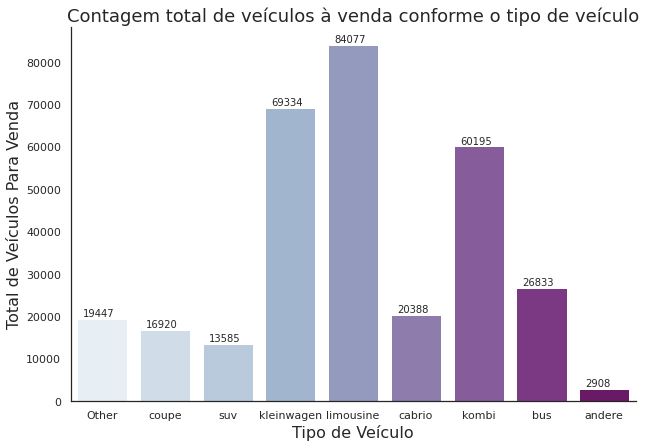

In [25]:
sns.set_style("white")
g = sns.catplot(x="vehicleType", data=veiculos, kind="count", palette="BuPu", height=6, aspect=1.5)
g.ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Total de Veículos Para Venda", fontdict= {'size':16})
g.ax.set_title("Contagem total de veículos à venda conforme o tipo de veículo",fontdict= {'size':18})

for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

## Número de veículos pertencentes a cada marca

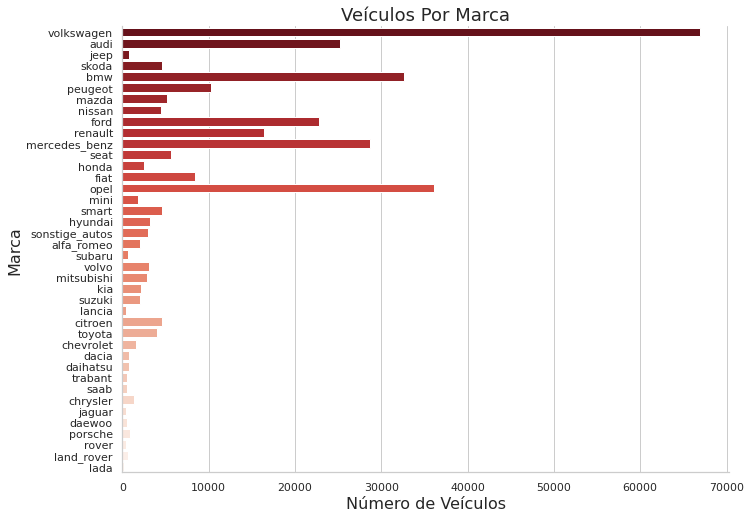

In [26]:
sns.set_style("whitegrid")
g = sns.catplot(y="brand", data=veiculos, kind="count", palette="Reds_r", height=7, aspect=1.5)
g.ax.set_title("Veículos Por Marca",fontdict={'size':18})
g.ax.xaxis.set_label_text("Número de Veículos",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Marca",fontdict= {'size':16})
plt.show()

## Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio

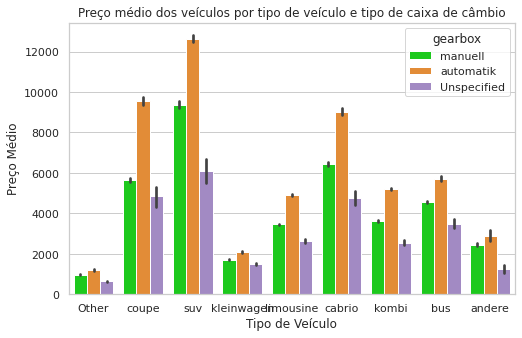

In [27]:
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="vehicleType", y="price",hue="gearbox", palette=colors, data=veiculos)
ax.set_title("Preço médio dos veículos por tipo de veículo e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':12})
ax.yaxis.set_label_text("Preço Médio",fontdict= {'size':12})
plt.show()

## Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio

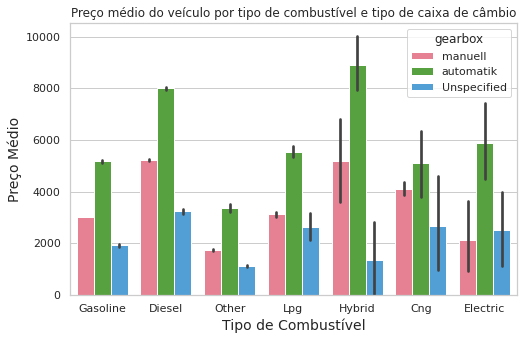

In [28]:
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="fuelType", y="price",hue="gearbox", palette="husl",data=veiculos)
ax.set_title("Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Combustível",fontdict= {'size':14})
ax.yaxis.set_label_text("Preço Médio",fontdict= {'size':14})
plt.show()

## Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio

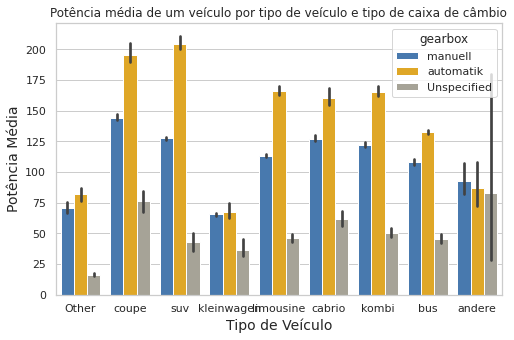

In [33]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
fig, ax = plt.subplots(figsize=(8,5))
sns.set_palette(sns.xkcd_palette(colors))
sns.barplot(x="vehicleType", y="powerPS",hue="gearbox",data=veiculos)
ax.set_title("Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':14})
ax.yaxis.set_label_text("Potência Média",fontdict= {'size':14})
plt.show()

## Média de preço por marca e por veículo

In [34]:
trial = pd.DataFrame()
for b in list(veiculos["brand"].unique()):
    for v in list(veiculos["vehicleType"].unique()):
        z = veiculos[(veiculos["brand"] == b) & (veiculos["vehicleType"] == v)]["price"].mean()
        trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)
trial.head(5)

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


## Preço médio de um veículo por marca, bem como tipo de veículo

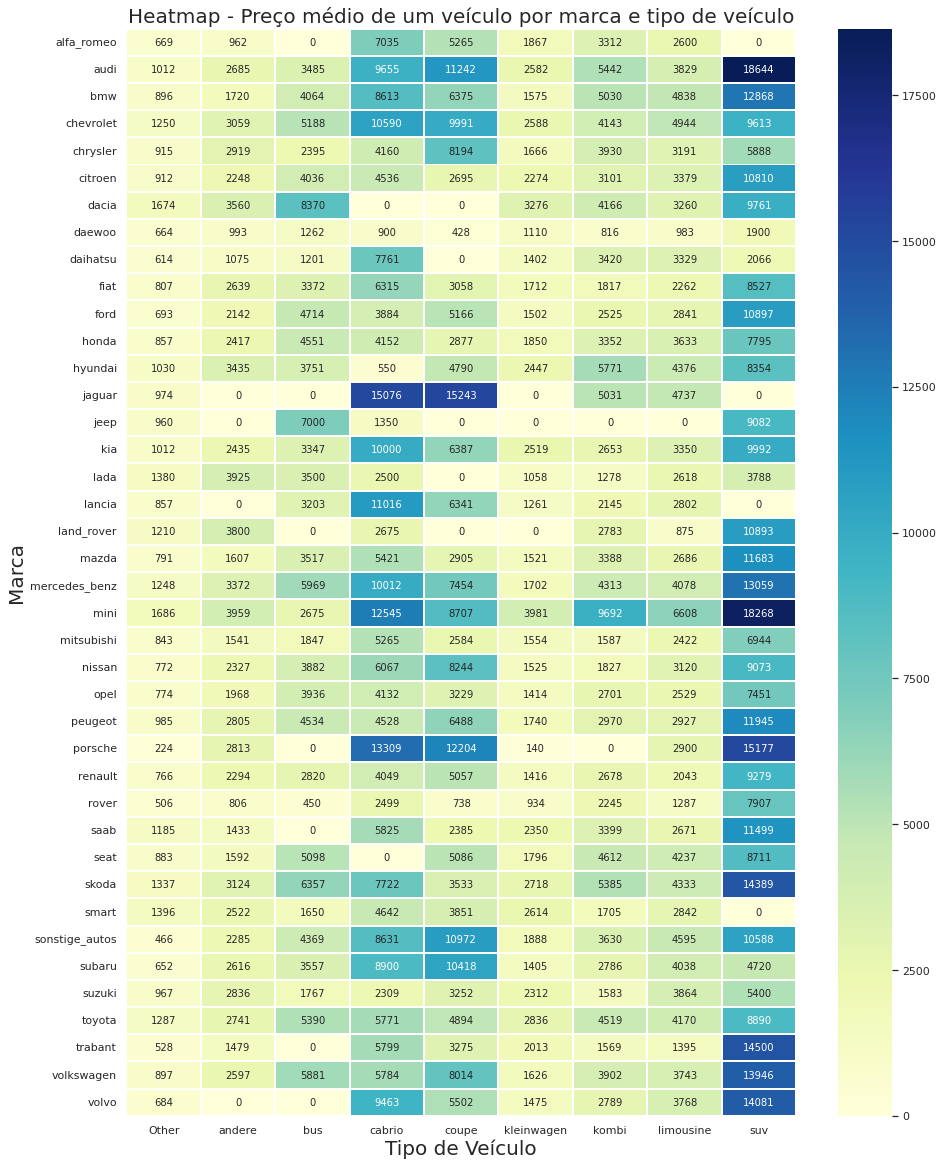

In [35]:
tri = trial.pivot("brand","vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
ax.set_title("Heatmap - Preço médio de um veículo por marca e tipo de veículo",fontdict={'size':20})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':20})
ax.yaxis.set_label_text("Marca",fontdict= {'size':20})
plt.show()